In [37]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import gymnasium as gym

In [57]:
filename_sarsa = "./SARSA/TD_SARSA_ep_500_eps_0.1_gam_1_alph_0.1.pkl"
filename_q_learning = "./QLearning/TD_QLearning_ep_500_eps_0.1_gam_1_alph_0.1.pkl"
filename_exp_sarsa = "./ExpectedSARSA/TD_ExpSARSA_ep_500_eps_0.1_gam_1_alph_0.1.pkl"

In [58]:
def load_object(filename):
    with open(filename, 'rb') as inp:
        agent = pickle.load(inp)
    return agent

agent_sarsa = load_object(filename_sarsa)
agent_q_learning = load_object(filename_q_learning)
agent_exp_sarsa = load_object(filename_exp_sarsa)

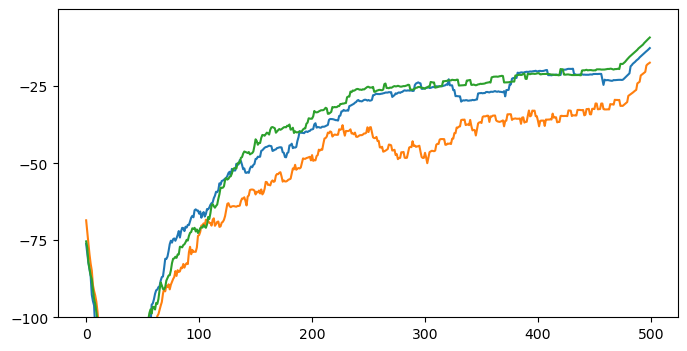

In [59]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

plt.figure(figsize=(8,4))

smooth_factor = 50

plt.plot(smooth(agent_sarsa["ep_reward"], smooth_factor))
plt.plot(smooth(agent_q_learning["ep_reward"], smooth_factor))
plt.plot(smooth(agent_exp_sarsa["ep_reward"], smooth_factor))

plt.ylim([-100,0])
plt.yticks([-100, -75, -50, -25])
plt.show()

In [63]:
terminated = False
env = gym.make('CliffWalking-v0', render_mode="human")
observation, info = env.reset()

action_list = []
state_list = [observation]

while terminated == False:

    action = np.argmax(agent_sarsa["policy"][observation])
    observation, reward, terminated, truncated, info = env.step(action)

    action_list.append(action)
    state_list.append(observation)
env.close()

grid_world = np.zeros((4,12))

for state in state_list:
    x = state // 12
    y = state % 12
    grid_world[x,y] = 1

print(grid_world)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [64]:
terminated = False
env = gym.make('CliffWalking-v0', render_mode="human")
observation, info = env.reset()

action_list = []
state_list = [observation]

while terminated == False:

    action = np.argmax(agent_q_learning["policy"][observation])
    observation, reward, terminated, truncated, info = env.step(action)

    action_list.append(action)
    state_list.append(observation)
env.close()

grid_world = np.zeros((4,12))

for state in state_list:
    x = state // 12
    y = state % 12
    grid_world[x,y] = 1

print(grid_world)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [65]:
terminated = False
env = gym.make('CliffWalking-v0', render_mode="human")
observation, info = env.reset()

action_list = []
state_list = [observation]

while terminated == False:

    action = np.argmax(agent_exp_sarsa["policy"][observation])
    observation, reward, terminated, truncated, info = env.step(action)

    action_list.append(action)
    state_list.append(observation)
env.close()

grid_world = np.zeros((4,12))

for state in state_list:
    x = state // 12
    y = state % 12
    grid_world[x,y] = 1

print(grid_world)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
